# WeatherPy
----

In [124]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [125]:
# # List for holding lat_lngs and cities
# lat_lngs = []
# cities = []

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(lat_range[0], lat_range[1], size=10) #reduced to generate smaller # for initial run
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=10)
# lat_lngs = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# # Print the city count to confirm sufficient count
# len(cities)

10

In [143]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [127]:
# #create the url call after setting the config using the API saved above
# url = "http://api.openweathermap.org/data/2.5/weather?"
# #city = "Tulum" #run a test prior to building the for loop

# # Build query URL to get the weather data for city, will create a new variable for cities list once test complete
# query_url = url + "appid=" + weather_api_key + "&q=" + city 


In [57]:
# Get weather data to test one prior to building for loop
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

# Get the weather data from the response
#print(f"The weather API responded with: {weather_json}.") #weather for Visnes from reduced random list

The weather API responded with: {'coord': {'lon': -87.4667, 'lat': 20.2167}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 303.15, 'feels_like': 306.39, 'temp_min': 303.15, 'temp_max': 303.15, 'pressure': 1014, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 100}, 'clouds': {'all': 20}, 'dt': 1619363540, 'sys': {'type': 1, 'id': 7130, 'country': 'MX', 'sunrise': 1619349835, 'sunset': 1619395878}, 'timezone': -18000, 'id': 3515040, 'name': 'Tulum', 'cod': 200}.


In [78]:
#print(f"City name and number: ") from test call
#print(weather_json['name'],weather_json['id'])

City name and number: 
Tulum 3515040


In [128]:
# #Use a for loop to create a series of API calls then print each city as it's being processed from test run

# city = 0

# for city in cities:
#     url = "http://api.openweathermap.org/data/2.5/weather?"
#     query_url = url + "appid=" + weather_api_key + "&q=" + city 
#     weather_response = requests.get(query_url)
#     weather_json = weather_response.json()

#     try:    #Include a try/except for any items that have an error
        
#         print(f"City name and number: ") 
#         print(weather_json['name'],weather_json['id'])
        
#     except (KeyError, IndexError):
#         print("Missing field/result... skipping.")
        
# pass

# #start with a sample before calling the larger list

City name and number: 
Kavieng 2094342
City name and number: 
Aksu 1529660
City name and number: 
Missing field/result... skipping.
City name and number: 
Ushuaia 3833367
City name and number: 
Toguchin 1489508
City name and number: 
Valenzano 6541260
City name and number: 
Jalpan 3526601
City name and number: 
Geraldton 2070998
City name and number: 
Yulara 6355222
City name and number: 
Khatanga 2022572


In [144]:
# #Use a for loop to create a series of API calls then print each city as it's being processed
# Determined a need to create empty lists to store the data

city_name = []
country = []
date = []
lat = []
lon = []
clouds = []
humidity = []
max_temp = []
wind_spd = []

index_counter = 0
set_counter = 1


city = 0

url = "http://api.openweathermap.org/data/2.5/weather?"

#need to count within the for loop while iterating through the rows
for index, city in enumerate(cities, start = 1):
    try:
        query_url = f"{url}appid={weather_api_key}&q=" 
        response_json = requests.get(query_url + city).json()
        city_name.append(response_json["name"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        lat.append(response_json["coord"]["lat"])
        lon.append(response_json["coord"]["lon"])
        clouds.append(response_json["clouds"]["all"])
        humidity.append(response_json["main"]["humidity"])
        max_temp.append(response_json['main']['temp_max'])
        wind_spd.append(response_json["wind"]["speed"])
        
        index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")
    
#     weather_response = requests.get(query_url)
#     weather_json = weather_response.json()

#     try:    #Include a try/except for any items that have an error
        
#         print(f"City name and number: ") 
#         print(weather_json['name'],weather_json['id'])
        
#     except (KeyError, IndexError):
#         print("Missing field/result... skipping.")
        
pass #tested on small dataset, before running on larger one

Processing Record 1 of Set 1 : alta floresta
Processing Record 2 of Set 1 : sur
Processing Record 3 of Set 1 : rikitea
Processing Record 4 of Set 1 : puerto ayora
Processing Record 5 of Set 1 : kelowna
Processing Record 6 of Set 1 : touros
Processing Record 7 of Set 1 : havelock
Processing Record 8 of Set 1 : okha
Processing Record 9 of Set 1 : ixtapa
City not found. Skipping...
Processing Record 10 of Set 1 : tahta
Processing Record 11 of Set 1 : santiago del estero
Processing Record 12 of Set 1 : kavieng
Processing Record 13 of Set 1 : tateyama
Processing Record 14 of Set 1 : iquique
Processing Record 15 of Set 1 : mount isa
Processing Record 16 of Set 1 : souillac
Processing Record 17 of Set 1 : camaqua
Processing Record 18 of Set 1 : cacimba de dentro
City not found. Skipping...
Processing Record 19 of Set 1 : chuy
Processing Record 20 of Set 1 : codrington
Processing Record 21 of Set 1 : saint george
City not found. Skipping...
Processing Record 22 of Set 1 : butaritari
Processing

Processing Record 183 of Set 1 : innisfail
Processing Record 184 of Set 1 : kharan
Processing Record 185 of Set 1 : darasun
City not found. Skipping...
Processing Record 186 of Set 1 : bozeman
Processing Record 187 of Set 1 : zhongshu
Processing Record 188 of Set 1 : kaitangata
Processing Record 189 of Set 1 : ponta do sol
Processing Record 190 of Set 1 : lufilufi
Processing Record 191 of Set 1 : mahebourg
Processing Record 192 of Set 1 : vostok
Processing Record 193 of Set 1 : canico
Processing Record 194 of Set 1 : udalguri
Processing Record 195 of Set 1 : guatire
Processing Record 196 of Set 1 : ilulissat
Processing Record 197 of Set 1 : djambala
Processing Record 198 of Set 1 : ruston
Processing Record 199 of Set 1 : kurayoshi
Processing Record 200 of Set 1 : hambantota
Processing Record 201 of Set 1 : guerrero negro
Processing Record 202 of Set 1 : sarakhs
Processing Record 203 of Set 1 : constitucion
Processing Record 204 of Set 1 : barcelos
Processing Record 205 of Set 1 : khari

Processing Record 369 of Set 1 : udachnyy
Processing Record 370 of Set 1 : axim
Processing Record 371 of Set 1 : puerto palomas
Processing Record 372 of Set 1 : konotop
Processing Record 373 of Set 1 : the valley
Processing Record 374 of Set 1 : ahipara
Processing Record 375 of Set 1 : christchurch
Processing Record 376 of Set 1 : rawson
Processing Record 377 of Set 1 : alice springs
Processing Record 378 of Set 1 : cerrik
Processing Record 379 of Set 1 : knin
Processing Record 380 of Set 1 : srednekolymsk
Processing Record 381 of Set 1 : ambon
Processing Record 382 of Set 1 : uthal
Processing Record 383 of Set 1 : mitu
Processing Record 384 of Set 1 : awjilah
Processing Record 385 of Set 1 : champerico
Processing Record 386 of Set 1 : isiro
City not found. Skipping...
Processing Record 387 of Set 1 : khorixas
Processing Record 388 of Set 1 : vanimo
Processing Record 389 of Set 1 : svetlogorsk
City not found. Skipping...
Processing Record 390 of Set 1 : zhoucheng
Processing Record 391 

Processing Record 556 of Set 1 : usinsk
Processing Record 557 of Set 1 : macae
Processing Record 558 of Set 1 : mehamn
Processing Record 559 of Set 1 : turayf
Processing Record 560 of Set 1 : susangerd
Processing Record 561 of Set 1 : mahon
Processing Record 562 of Set 1 : netrakona
Processing Record 563 of Set 1 : palmer
Processing Record 564 of Set 1 : acapulco
Processing Record 565 of Set 1 : satipo
Processing Record 566 of Set 1 : naron
Processing Record 567 of Set 1 : adrar
Processing Record 568 of Set 1 : puerto escondido
Processing Record 569 of Set 1 : pacific grove
Processing Record 570 of Set 1 : panguna
Processing Record 571 of Set 1 : brae
Processing Record 572 of Set 1 : george
Processing Record 573 of Set 1 : coahuayana
Processing Record 574 of Set 1 : soure
Processing Record 575 of Set 1 : ust-maya
Processing Record 576 of Set 1 : meadow lake
Processing Record 577 of Set 1 : eydhafushi
Processing Record 578 of Set 1 : liku
Processing Record 579 of Set 1 : bambanglipuro
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [146]:
# 1st, create a data frame
weather_df = pd.DataFrame({ 
                "City" : city_name,
                "Country" : country,
                "Date" : date,
                "Latitude" : lat,
                "Longtitude" : lon,
                "Cloudiness" : clouds,
                "Humidity" : humidity,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_spd
})

weather_df.tail(10)

,City,Country,Date,Latitude,Longtitude,Cloudiness,Humidity,Max Temp,Wind Speed
574,Ust-Maya,RU,1619373375,60.4167,134.5333,99,98,270.00,1.07
575,Meadow Lake,US,1619373375,34.8014,-106.5436,20,15,299.26,4.63
576,Eydhafushi,MV,1619373375,5.1033,73.0708,22,73,301.76,2.26
577,Liku,ID,1619373376,-0.7275,119.8922,85,89,297.24,1.47
578,Bambanglipuro,ID,1619372996,-7.9500,110.2833,93,84,297.56,2.05
579,Zhangaözen,KZ,1619373376,43.3000,52.8000,27,31,293.17,1.86
580,Asenovgrad,BG,1619373377,42.0167,24.8667,21,50,287.15,3.09
581,Bentiu,SS,1619373000,9.2333,29.8333,71,54,301.25,3.64
582,Trairi,BR,1619372980,-3.2778,-39.2689,85,68,301.78,4.33
583,Salina,US,1619373377,38.8403,-97.6114,1,49,296.48,9.77


In [149]:
# Save Data to csv
weather_df.to_csv("weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [162]:
# use loc to find if there are any cities with humidity over 100%
extrm_hum = weather_df.loc[weather_df["Humidity"] >= 100, :]
extrm_hum.head()
### There are no cities with humidity above 100% in this dataset ###

,City,Country,Date,Latitude,Longtitude,Cloudiness,Humidity,Max Temp,Wind Speed
65,Jyvaskyla,FI,1619373242,62.2415,25.7209,90,100,275.37,5.14
79,Neiafu,TO,1619373245,-18.6500,-173.9833,40,100,294.15,1.99
114,Husavik,IS,1619372911,66.0449,-17.3389,90,100,277.15,7.72
227,Volnovakha,UA,1619373277,47.6010,37.4967,64,100,282.59,1.34
270,Cooma,AU,1619373288,-36.2333,149.1333,19,100,274.15,1.02


In [160]:
#  Get the indices of cities that have humidity over 100%.

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

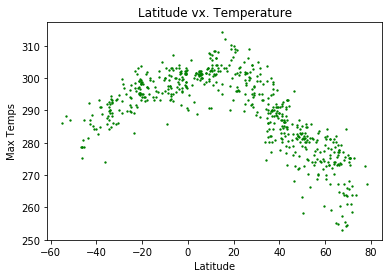

In [172]:
#x is the independant (latitude) variable, while y is the dependant (temp) variable
temp = weather_df['Max Temp']
lati = weather_df['Latitude']

#set the variables, the labels, and title while calling the plot
x_values = lati
y_values = temp
plt.scatter(x_values, y_values,s = 1.75, color = 'green')
plt.title('Latitude vx. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temps')

#save image and show plot
plt.savefig("../Resources/lat_temp.png")
plt.show()


## Latitude vs. Humidity Plot

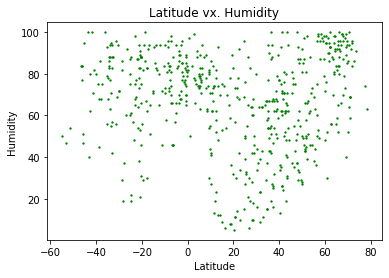

In [173]:
#x is the independant (latitude) variable, while y is the dependant (humidity) variable
humi = weather_df['Humidity']
lati = weather_df['Latitude']

#set the variables, the labels, and title while calling the plot
x_values = lati
y_values = humi
plt.scatter(x_values, y_values,s = 1.75, color = 'green')
plt.title('Latitude vx. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#save image and show plot
plt.savefig("../Resources/lat_humidity.png")
plt.show()



## Latitude vs. Cloudiness Plot

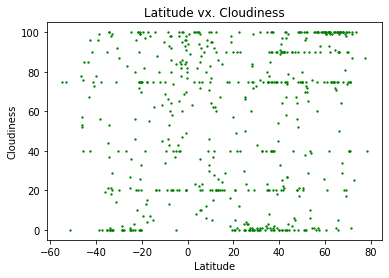

In [175]:
#x is the independant (latitude) variable, while y is the dependant (cloudiness) variable
cloud = weather_df['Cloudiness']
lati = weather_df['Latitude']

#set the variables, the labels, and title while calling the plot
x_values = lati
y_values = cloud
plt.scatter(x_values, y_values,s = 1.75, color = 'green')
plt.title('Latitude vx. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#save image and show plot
plt.savefig("../Resources/lat_cloud.png")
plt.show()



## Latitude vs. Wind Speed Plot

In [ ]:
#x is the independant (latitude) variable, while y is the dependant (wind speed) variable
windi = weather_df['Wind Speed']
lati = weather_df['Latitude']

#set the variables, the labels, and title while calling the plot
x_values = lati
y_values = windi
plt.scatter(x_values, y_values,s = 1.75, color = 'green')
plt.title('Latitude vx. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#save image and show plot
plt.savefig("../Resources/lat_wind.png")
plt.show()



## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression